8. We will now perform cross-validation on a simulated data set.

In [2]:
library(ISLR2)
library(MASS)
library(ggplot2)
library(ggthemes)
library(boot)
library(skimr)
library(caret)

# Define a color cycle to use
colors <- colorblind_pal()(8)


(a) Generate a simulated data set as follows:

In [3]:
set.seed(1)
n <- 100
x <- rnorm(n)
y <- x - 2.0 * x^2 + rnorm(n)

In this data set, what is $n$ and what is $p$? Write out the model used to generate the data in equation form.

$n = 100$, is the number of observations or samples we produced with the `rnorm` function.

$p = 1$, is the predictor `x` used to build the reponse `y`.

$y = x - 2 x^2 + N(x, \mu = 0, \sigma = 1) = x - 2 x^2 + \frac{1}{\sqrt{2\pi}} \exp(-x^2/2)$

(b) Create a scatterplot of `x` against `y`. Comment on what you find.

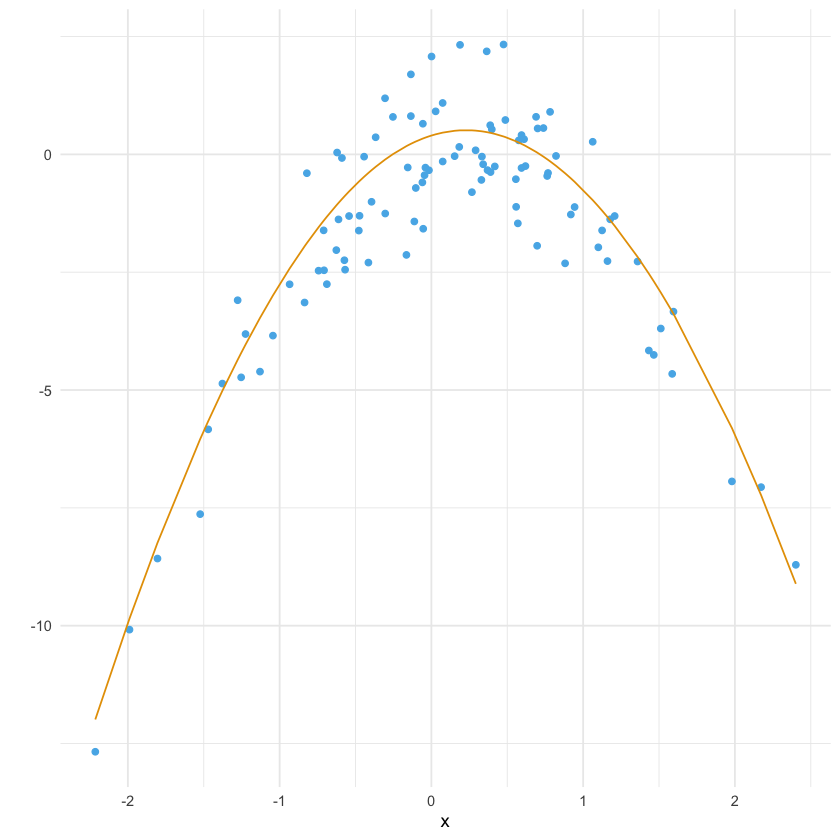

In [29]:
yhat <- x - 2.0 * x^2 + exp(-x^2 / 2) / sqrt(2 * pi)

ggplot(data.frame(x = x, y = y, yhat = yhat), aes(x = x, y, yhat)) +
    geom_point(aes(x, y), color = colors[3]) +
    geom_line(aes(x, yhat), color = colors[2]) +
    ylab("") +
    theme_minimal()


(c) Set a random seed, and then compute the LOOCV errors that result from fitting the following four models using least squares:

  1. $y = \beta_0 + \beta_1 x + \epsilon$

  2. $y = \beta_0 + \beta_1 x + \beta_2 x^2 + \epsilon$
  
  3. $y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \epsilon$

  4. $y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \beta_4 x^4 + \epsilon$

In [72]:

df <- data.frame(x = x, y = y)
cv_error <- numeric(length = 4)
summary_fit <- list()
fit <- list()
set.seed(1)
for (i in seq(4)) {
    fit[[i]] <- glm(y ~ poly(x, i), data = df)
    summary_fit[[i]] <- summary(fit)
    cv_error[i] <- cv.glm(df, fit[[i]])$delta[1]
}
cv_error

[1] 7.2881616 0.9374236 0.9566218 0.9539049

We see a sharp drop in the estimated test MSE between the linear and quadratic fits. Increasing to a third polynomial reduces even further the cross-validation MSE. For the 4-th polynomial the MSE deteriorates.

(d) Repeat (c) using another random seed, and report your results.
Are your results the same as what you got in (c)? Why?

In [50]:
cv_error_2 <- numeric(length = 4)
set.seed(12142)
for (i in seq(4)) {
    fit <- glm(y ~ poly(x, i), data = df)
    cv_error_2[i] <- cv.glm(df, fit)$delta[1]
}
cv_error_2

[1] 7.2881616 0.9374236 0.9566218 0.9539049

The results although similar up to a decimal point, are different due to the `set.seed()` command, which sets the seed to draw the one observation in the LOOCV procedure. It might happend that the observation left-out is a different one in every case.

(e) Which of the models in (c) had the smallest LOOCV error? Is this what you expected? Explain your answer.

The lowest MSE appears with the 3rd polynomial. According to the plot above, we see that the bell-shaped curve describe by the points is a not a quadratic, but more accute. So the cubic fit seems reasonable. The fourth order polynomial is not justified for such a small range of $x$ and seems to overfit the test MSE.

In [71]:
cat("p-values for the t-statistic of each coefficient:")
for (i in 1:4) {
    cat("\n")
    print(summary_fit[[i]]$coef[, 4])
}

p-values for the t-statistic of each coefficient:
 (Intercept)   poly(x, i) 
3.953542e-08 1.923846e-02 

 (Intercept)  poly(x, i)1  poly(x, i)2 
2.656229e-29 4.184810e-09 4.584330e-44 

 (Intercept)  poly(x, i)1  poly(x, i)2  poly(x, i)3 
4.995066e-29 4.971565e-09 1.216703e-43 7.843990e-01 

 (Intercept)  poly(x, i)1  poly(x, i)2  poly(x, i)3  poly(x, i)4 
5.169227e-29 4.590732e-09 1.593826e-43 7.836207e-01 1.930956e-01 


The $p$-value for each of the coefficients suggest that only the 2nd order polynomial is significant. 
The $p$-value of the third and fourth polynomials model suggest that adding a 3rd and 4th order term is not significant. Notice that we do not have an overall F-statistic with the `cv.glm`, unlike the case of `lm`, so evaluating each of the $t$-statistics might not be accurate.

So according to the $p$-value of the $t$-statistic the correct choice would be the model with quadratic term. However, if we accept the $p$-value statement, it could also happen that the third order polynomial might be overfitting, or we can use the $p$-value statement to justify the two order polynomial model against the 3rd one, for a small improvement imposed by the latter. 

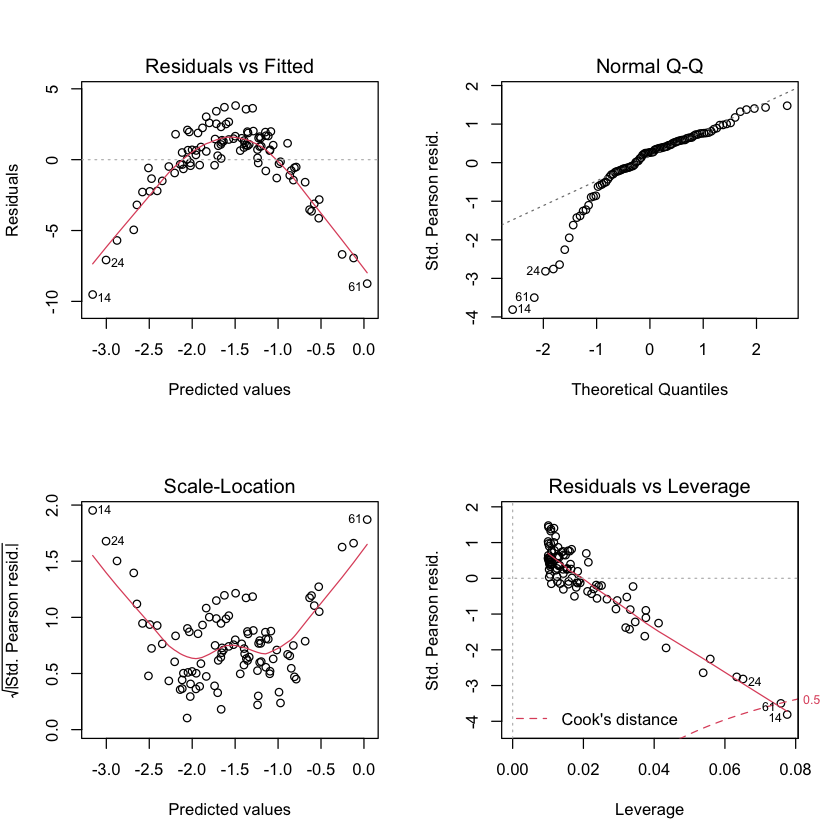

In [74]:
par(mfrow = c(2, 2))
plot(fit[[1]])

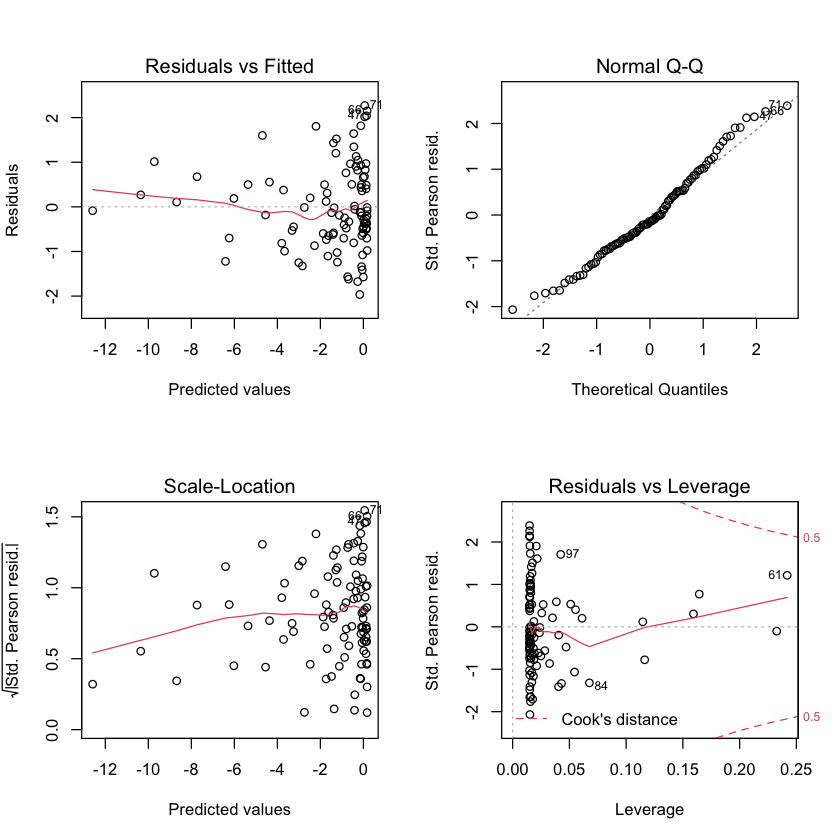

In [75]:
par(mfrow = c(2, 2))
plot(fit[[2]])

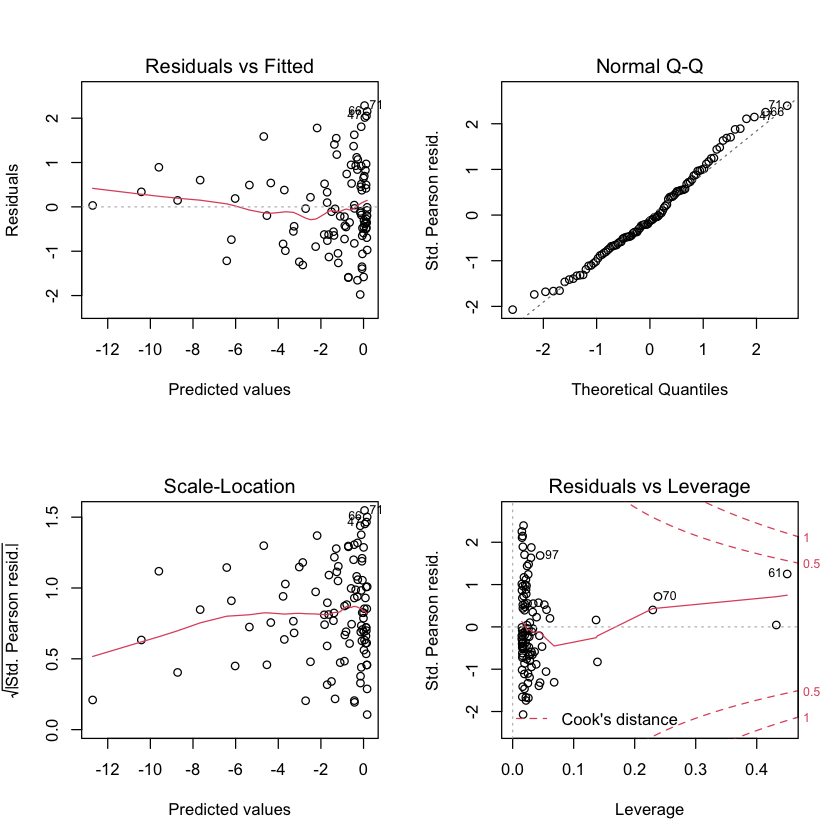

In [76]:
par(mfrow = c(2, 2))
plot(fit[[3]])

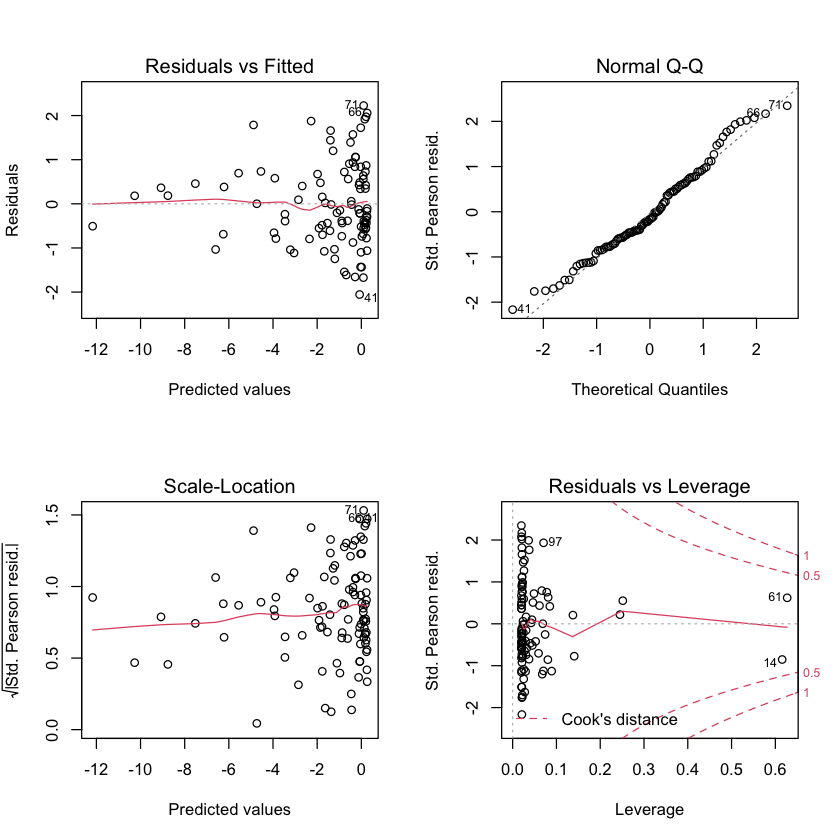

In [77]:
par(mfrow = c(2, 2))
plot(fit[[4]])